## **<div align="center">(b) Evaluate whether older planes suffer more delays on a year-to-year basis.** ##

## Cleaning the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# Importing the required datasets

In [2]:
cleaned_dataset = pd.read_csv("cleaned_dataset.csv")
cleaned_dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,0,0,0,0,0,0,4.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,0,0,0,0,0,0,-5.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,0,0,0,0,0,0,-23.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,0,0,0,0,0,0,-10.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,0,0,0,0,0,0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595132,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,14,17,0,0,0,0,0,0,0,6.0
14595133,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,6,21,0,0,0,0,0,0,0,16.0
14595134,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,14,19,0,0,0,0,15,0,0,14.0
14595135,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,11,14,0,0,0,0,0,0,36,74.0


In [3]:
planes = pd.read_csv(r"C:\Users\DELL\Documents\python codes\plane-data (1).csv")
planes

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992.0
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002.0
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992.0
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0


In [4]:
#Converting 'None' data into NaN values

planes['year'] = planes['year'].replace('none', np.nan)
planes

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992.0
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002.0
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992.0
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0


In [5]:
# Removing rows with missing values
planes = planes.dropna()
planes

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986.0
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999.0
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992.0
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002.0
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992.0
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0


In [6]:
#dropping duplicated rows
planes.drop_duplicates(inplace=True)
planes

C:\Users\DELL\AppData\Local\Temp\ipykernel_17028\1603112020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes.drop_duplicates(inplace=True)


,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986.0
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999.0
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992.0
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002.0
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992.0
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0


In [7]:
#renaming the column "tailnum" to "TailNum"

planes = planes.rename(columns={'tailnum':'TailNum'})

In [8]:
planes.columns

Index(['TailNum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

In [9]:
# Saving the cleaned plane data for future requirements

planes.to_csv('planes.csv', index=False)

In [10]:
# Left merging the plane data with the cleaned dataset

merged_with_planes = pd.merge(cleaned_dataset, planes , on="TailNum", how="left")
merged_with_planes

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,LateAircraftDelay,Total_Delay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0,4.0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,0,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,0,-23.0,Corporation,AIRBUS INDUSTRIE,01/25/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1997.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,0,-10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,0,-8.0,Corporation,BOEING,09/28/2005,737-3G7,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595132,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,0,6.0,Corporation,BOEING,01/10/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992.0
14595133,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,0,16.0,Corporation,BOEING,08/24/2000,767-432ER,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0
14595134,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,0,14.0,Corporation,BOEING,04/03/1987,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1987.0
14595135,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,36,74.0,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,12/14/2007,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0


In [11]:
# Saving the merged data
merged_with_planes.to_csv('merged_with_planes.csv', index=False)

In [12]:
merged_with_planes.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'Total_Delay', 'type',
       'manufacturer', 'issue_date', 'model', 'status', 'aircraft_type',
       'engine_type', 'year'],
      dtype='object')

In [13]:
# Changing 'year' to 'YearOfManufacture'

merged_with_planes = merged_with_planes.rename(columns={"year": "YearOfManufacture"}) 

In [14]:
merged_with_planes.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
Total_Delay          float64
type                  object
manufacturer          object
issue_date            object
model                 object
status                object
aircraft_type 

In [15]:
#extracting the desired columns for question 2
planes_b = merged_with_planes[["TailNum","Year","YearOfManufacture","ArrDelay","DepDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
planes_b

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,N657AW,2006,1999.0,6.0,-2.0,0,0,0,0,0
1,N834AW,2006,NaN,-5.0,0.0,0,0,0,0,0
2,N605AW,2006,1997.0,-23.0,0.0,0,0,0,0,0
3,N312AW,2006,NaN,-8.0,-2.0,0,0,0,0,0
4,N309AW,2006,1990.0,0.0,-8.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14595132,N670DN,2007,1992.0,13.0,-7.0,0,0,0,0,0
14595133,N829MH,2007,2000.0,5.0,11.0,0,0,0,0,0
14595134,N623DL,2007,1987.0,15.0,-1.0,0,0,15,0,0
14595135,N970DL,2007,1990.0,36.0,38.0,0,0,0,0,36


In [16]:
# Removing the missing values

planes_b = planes_b.dropna()
planes_b

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,N657AW,2006,1999.0,6.0,-2.0,0,0,0,0,0
2,N605AW,2006,1997.0,-23.0,0.0,0,0,0,0,0
4,N309AW,2006,1990.0,0.0,-8.0,0,0,0,0,0
5,N733UW,2006,2000.0,2.0,-3.0,0,0,0,0,0
7,N404US,2006,1989.0,7.0,-3.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14595132,N670DN,2007,1992.0,13.0,-7.0,0,0,0,0,0
14595133,N829MH,2007,2000.0,5.0,11.0,0,0,0,0,0
14595134,N623DL,2007,1987.0,15.0,-1.0,0,0,15,0,0
14595135,N970DL,2007,1990.0,36.0,38.0,0,0,0,0,36


In [17]:
#checking for null values
pd.isnull(planes_b).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
ArrDelay             0
DepDelay             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [18]:
planes_b["YearOfManufacture"] = planes_b["YearOfManufacture"].astype('int64')
planes_b.dtypes

C:\Users\DELL\AppData\Local\Temp\ipykernel_17028\1660682308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_b["YearOfManufacture"] = planes_b["YearOfManufacture"].astype('int64')


TailNum               object
Year                   int64
YearOfManufacture      int64
ArrDelay             float64
DepDelay             float64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

In [19]:
planes_b = planes_b[planes_b['YearOfManufacture'] != 0]
planes_b

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,N657AW,2006,1999,6.0,-2.0,0,0,0,0,0
2,N605AW,2006,1997,-23.0,0.0,0,0,0,0,0
4,N309AW,2006,1990,0.0,-8.0,0,0,0,0,0
5,N733UW,2006,2000,2.0,-3.0,0,0,0,0,0
7,N404US,2006,1989,7.0,-3.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14595132,N670DN,2007,1992,13.0,-7.0,0,0,0,0,0
14595133,N829MH,2007,2000,5.0,11.0,0,0,0,0,0
14595134,N623DL,2007,1987,15.0,-1.0,0,0,15,0,0
14595135,N970DL,2007,1990,36.0,38.0,0,0,0,0,36


In [20]:
#Calculating Plane Age 

planes_b['PlaneAge'] = planes_b['Year'] - planes_b['YearOfManufacture']
planes_b

C:\Users\DELL\AppData\Local\Temp\ipykernel_17028\3817623273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_b['PlaneAge'] = planes_b['Year'] - planes_b['YearOfManufacture']


,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
0,N657AW,2006,1999,6.0,-2.0,0,0,0,0,0,7
2,N605AW,2006,1997,-23.0,0.0,0,0,0,0,0,9
4,N309AW,2006,1990,0.0,-8.0,0,0,0,0,0,16
5,N733UW,2006,2000,2.0,-3.0,0,0,0,0,0,6
7,N404US,2006,1989,7.0,-3.0,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...
14595132,N670DN,2007,1992,13.0,-7.0,0,0,0,0,0,15
14595133,N829MH,2007,2000,5.0,11.0,0,0,0,0,0,7
14595134,N623DL,2007,1987,15.0,-1.0,0,0,15,0,0,20
14595135,N970DL,2007,1990,36.0,38.0,0,0,0,0,36,17


In [21]:
# Making plane age <0 a null value
planes_b.loc[planes_b['PlaneAge']<0 , 'PlaneAge'] = np.nan
planes_b

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
0,N657AW,2006,1999,6.0,-2.0,0,0,0,0,0,7.0
2,N605AW,2006,1997,-23.0,0.0,0,0,0,0,0,9.0
4,N309AW,2006,1990,0.0,-8.0,0,0,0,0,0,16.0
5,N733UW,2006,2000,2.0,-3.0,0,0,0,0,0,6.0
7,N404US,2006,1989,7.0,-3.0,0,0,0,0,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
14595132,N670DN,2007,1992,13.0,-7.0,0,0,0,0,0,15.0
14595133,N829MH,2007,2000,5.0,11.0,0,0,0,0,0,7.0
14595134,N623DL,2007,1987,15.0,-1.0,0,0,15,0,0,20.0
14595135,N970DL,2007,1990,36.0,38.0,0,0,0,0,36,17.0


In [22]:
# dropping null values
planes_b = planes_b.dropna()
planes_b

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
0,N657AW,2006,1999,6.0,-2.0,0,0,0,0,0,7.0
2,N605AW,2006,1997,-23.0,0.0,0,0,0,0,0,9.0
4,N309AW,2006,1990,0.0,-8.0,0,0,0,0,0,16.0
5,N733UW,2006,2000,2.0,-3.0,0,0,0,0,0,6.0
7,N404US,2006,1989,7.0,-3.0,0,0,0,0,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
14595132,N670DN,2007,1992,13.0,-7.0,0,0,0,0,0,15.0
14595133,N829MH,2007,2000,5.0,11.0,0,0,0,0,0,7.0
14595134,N623DL,2007,1987,15.0,-1.0,0,0,15,0,0,20.0
14595135,N970DL,2007,1990,36.0,38.0,0,0,0,0,36,17.0


In [23]:
# Removing early arrivals
planes_b = planes_b[planes_b["ArrDelay"] >= 0]
planes_b

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
0,N657AW,2006,1999,6.0,-2.0,0,0,0,0,0,7.0
4,N309AW,2006,1990,0.0,-8.0,0,0,0,0,0,16.0
5,N733UW,2006,2000,2.0,-3.0,0,0,0,0,0,6.0
7,N404US,2006,1989,7.0,-3.0,0,0,0,0,0,17.0
16,N105UW,2006,1999,149.0,132.0,0,0,149,0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
14595132,N670DN,2007,1992,13.0,-7.0,0,0,0,0,0,15.0
14595133,N829MH,2007,2000,5.0,11.0,0,0,0,0,0,7.0
14595134,N623DL,2007,1987,15.0,-1.0,0,0,15,0,0,20.0
14595135,N970DL,2007,1990,36.0,38.0,0,0,0,0,36,17.0


In [24]:
# Removing early departures
planes_b = planes_b[planes_b["DepDelay"] >= 0]
planes_b

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
16,N105UW,2006,1999,149.0,132.0,0,0,149,0,0,7.0
18,N702UW,2006,1998,25.0,8.0,0,0,25,0,0,8.0
49,N746UW,2006,2000,0.0,5.0,0,0,0,0,0,6.0
50,N757UW,2006,2000,13.0,20.0,0,0,0,0,0,6.0
51,N713UW,2006,1999,37.0,20.0,14,0,17,0,6,7.0
...,...,...,...,...,...,...,...,...,...,...,...
14595128,N6700,2007,1999,24.0,45.0,0,24,0,0,0,8.0
14595129,N659DL,2007,1990,1.0,6.0,0,0,0,0,0,17.0
14595133,N829MH,2007,2000,5.0,11.0,0,0,0,0,0,7.0
14595135,N970DL,2007,1990,36.0,38.0,0,0,0,0,36,17.0


## Relationship between Mean Arrival Delays, Mean Departure Delays and Total Delays vs Plane Age in 2006 and 2007

In [25]:
#Extracting the 2006 data from the cleaned dataset merged with plane data

delays2_2006 = planes_b[planes_b['Year'] == 2006]
delays2_2006

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
16,N105UW,2006,1999,149.0,132.0,0,0,149,0,0,7.0
18,N702UW,2006,1998,25.0,8.0,0,0,25,0,0,8.0
49,N746UW,2006,2000,0.0,5.0,0,0,0,0,0,6.0
50,N757UW,2006,2000,13.0,20.0,0,0,0,0,0,6.0
51,N713UW,2006,1999,37.0,20.0,14,0,17,0,6,7.0
...,...,...,...,...,...,...,...,...,...,...,...
7141906,N662DN,2006,1991,25.0,28.0,0,0,0,0,25,15.0
7141910,N982DL,2006,1991,4.0,8.0,0,0,0,0,0,15.0
7141914,N966DL,2006,1990,0.0,10.0,0,0,0,0,0,16.0
7141918,N651DL,2006,1989,62.0,30.0,30,0,32,0,0,17.0


In [26]:
# Extracting the desired columns for arrival delays in 2006
arrival_delays2006b = delays2_2006[["TailNum","Year","YearOfManufacture","ArrDelay",'PlaneAge']]
arrival_delays2006b

,TailNum,Year,YearOfManufacture,ArrDelay,PlaneAge
16,N105UW,2006,1999,149.0,7.0
18,N702UW,2006,1998,25.0,8.0
49,N746UW,2006,2000,0.0,6.0
50,N757UW,2006,2000,13.0,6.0
51,N713UW,2006,1999,37.0,7.0
...,...,...,...,...,...
7141906,N662DN,2006,1991,25.0,15.0
7141910,N982DL,2006,1991,4.0,15.0
7141914,N966DL,2006,1990,0.0,16.0
7141918,N651DL,2006,1989,62.0,17.0


In [27]:
#Extracting the desired columns for departure delays in 2006
departure_delays2006b = delays2_2006[["TailNum","Year","YearOfManufacture","DepDelay",'PlaneAge']]
departure_delays2006b

,TailNum,Year,YearOfManufacture,DepDelay,PlaneAge
16,N105UW,2006,1999,132.0,7.0
18,N702UW,2006,1998,8.0,8.0
49,N746UW,2006,2000,5.0,6.0
50,N757UW,2006,2000,20.0,6.0
51,N713UW,2006,1999,20.0,7.0
...,...,...,...,...,...
7141906,N662DN,2006,1991,28.0,15.0
7141910,N982DL,2006,1991,8.0,15.0
7141914,N966DL,2006,1990,10.0,16.0
7141918,N651DL,2006,1989,30.0,17.0


In [28]:
#Extracting the 2007 data from the cleaned dataset merged with plane data

delays2_2007  = planes_b[planes_b['Year'] == 2007]
delays2_2007

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
7141927,N611SW,2007,1995,3.0,10.0,0,0,0,0,0,12.0
7141941,N308SW,2007,1997,36.0,29.0,20,0,7,0,9,10.0
7141943,N603SW,2007,1995,26.0,32.0,9,0,0,0,17,12.0
7141956,N711HK,2007,1998,20.0,27.0,19,0,0,0,1,9.0
7141967,N711HK,2007,1998,33.0,39.0,16,0,0,0,17,9.0
...,...,...,...,...,...,...,...,...,...,...,...
14595128,N6700,2007,1999,24.0,45.0,0,24,0,0,0,8.0
14595129,N659DL,2007,1990,1.0,6.0,0,0,0,0,0,17.0
14595133,N829MH,2007,2000,5.0,11.0,0,0,0,0,0,7.0
14595135,N970DL,2007,1990,36.0,38.0,0,0,0,0,36,17.0


In [29]:
#Extracting the desired columns for arrival delays in 2007
arrival_delays2007b = delays2_2007[["TailNum","Year","YearOfManufacture","ArrDelay",'PlaneAge']]
arrival_delays2007b

,TailNum,Year,YearOfManufacture,ArrDelay,PlaneAge
7141927,N611SW,2007,1995,3.0,12.0
7141941,N308SW,2007,1997,36.0,10.0
7141943,N603SW,2007,1995,26.0,12.0
7141956,N711HK,2007,1998,20.0,9.0
7141967,N711HK,2007,1998,33.0,9.0
...,...,...,...,...,...
14595128,N6700,2007,1999,24.0,8.0
14595129,N659DL,2007,1990,1.0,17.0
14595133,N829MH,2007,2000,5.0,7.0
14595135,N970DL,2007,1990,36.0,17.0


In [30]:
#Extracting the desired columns for departure delays in 2007
departure_delays2007b = delays2_2007[["TailNum","Year","YearOfManufacture","DepDelay",'PlaneAge']]
departure_delays2007b

,TailNum,Year,YearOfManufacture,DepDelay,PlaneAge
7141927,N611SW,2007,1995,10.0,12.0
7141941,N308SW,2007,1997,29.0,10.0
7141943,N603SW,2007,1995,32.0,12.0
7141956,N711HK,2007,1998,27.0,9.0
7141967,N711HK,2007,1998,39.0,9.0
...,...,...,...,...,...
14595128,N6700,2007,1999,45.0,8.0
14595129,N659DL,2007,1990,6.0,17.0
14595133,N829MH,2007,2000,11.0,7.0
14595135,N970DL,2007,1990,38.0,17.0


In [31]:
departure_delays2007b.dtypes

TailNum               object
Year                   int64
YearOfManufacture      int64
DepDelay             float64
PlaneAge             float64
dtype: object

In [ ]:
# Converting PlaneAge into integers

arrival_delays2006b["PlaneAge"] = arrival_delays2006b["PlaneAge"].astype('int64')
departure_delays2006b["PlaneAge"] = departure_delays2006b["PlaneAge"].astype('int64')

arrival_delays2007b["PlaneAge"] = arrival_delays2007b["PlaneAge"].astype('int64')
departure_delays2007b["PlaneAge"] = departure_delays2007b["PlaneAge"].astype('int64')

In [33]:
# Calculating mean delays for 2006

mean_arrivaldelays_2006 = arrival_delays2006b.groupby('PlaneAge')['ArrDelay'].mean()
mean_departuredelays_2006 = departure_delays2006b.groupby('PlaneAge')['DepDelay'].mean()

total_delays_2006 = mean_arrivaldelays_2006 + mean_departuredelays_2006

In [34]:
# Calculating mean delays for 2007

mean_arrivaldelays_2007 = arrival_delays2007b.groupby('PlaneAge')['ArrDelay'].mean()
mean_departuredelays_2007 = departure_delays2007b.groupby('PlaneAge')['DepDelay'].mean()

total_delays_2007 = mean_arrivaldelays_2007 + mean_departuredelays_2007

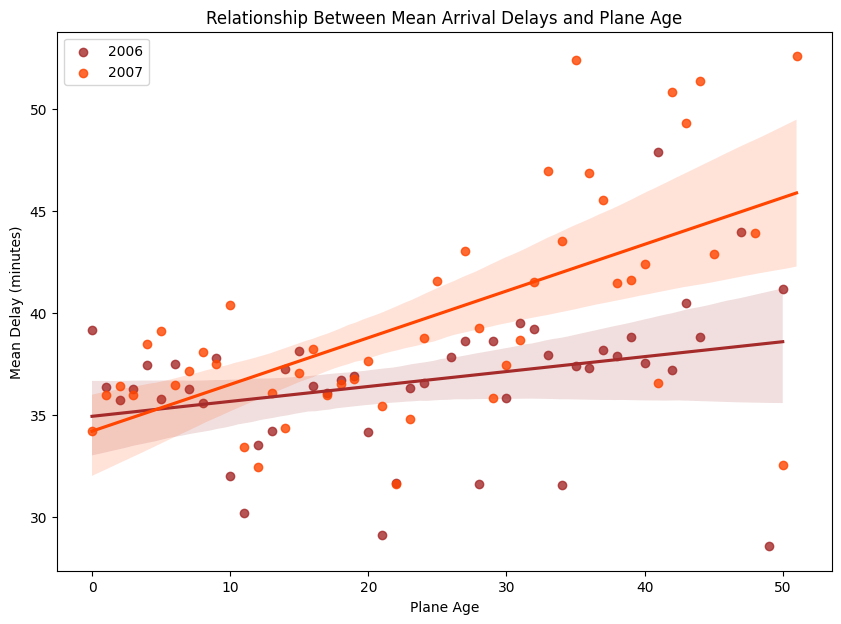

In [36]:
# Scatter Plot for Mean Arrival delays vs Plane Age

fig, ax = plt.subplots(figsize=(10,7))

sns.regplot(x=mean_arrivaldelays_2006.index, y=mean_arrivaldelays_2006, ax=ax, color='brown', label='2006')

sns.regplot(x=mean_arrivaldelays_2007.index, y=mean_arrivaldelays_2007, ax=ax, color='orangered', label='2007')

ax.set_xlabel('Plane Age')
ax.set_ylabel('Mean Delay (minutes)')
ax.set_title('Relationship Between Mean Arrival Delays and Plane Age')
plt.grid(False)
ax.legend()
plt.show()

In [37]:
#Calculating the correlation

corr, pval = pearsonr(mean_arrivaldelays_2006, mean_arrivaldelays_2006.index)
print('Mean Arrival Delay and Plane Age correlation in 2006:', corr)

corr, pval = pearsonr(mean_arrivaldelays_2007, mean_arrivaldelays_2007.index)
print('Mean Arrival Delay and Plane Age correlation is 2007:', corr)

Mean Arrival Delay and Plane Age correlation in 2006: 0.30448110409854445
Mean Arrival Delay and Plane Age correlation is 2007: 0.6273554067534186


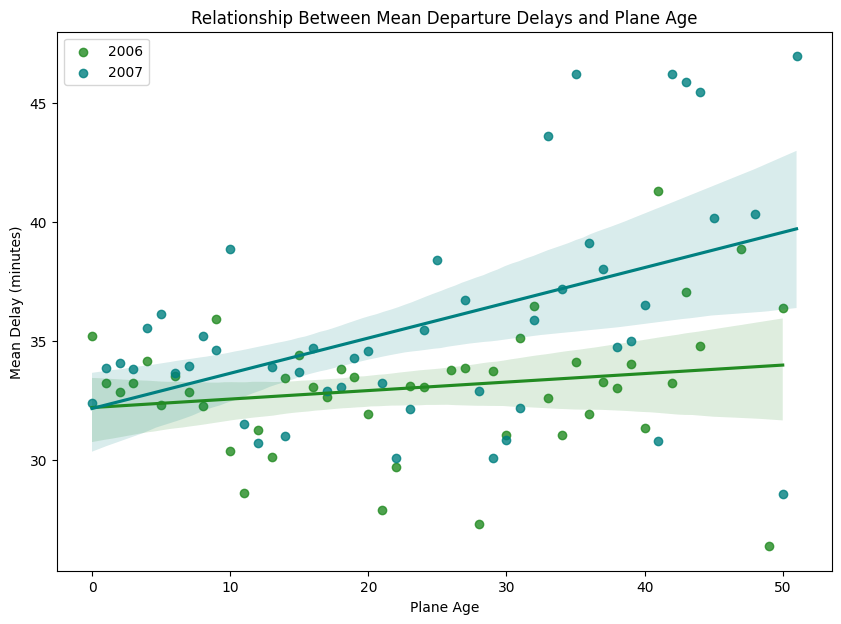

In [38]:
# Scatter Plot for Mean Dearture delays vs Plane Age

fig, ax = plt.subplots(figsize=(10,7))

sns.regplot(x=mean_departuredelays_2006.index, y=mean_departuredelays_2006, ax=ax, color='forestgreen', label='2006')

sns.regplot(x=mean_departuredelays_2007.index, y=mean_departuredelays_2007, ax=ax, color='teal', label='2007')

ax.set_xlabel('Plane Age')
ax.set_ylabel('Mean Delay (minutes)')
ax.set_title('Relationship Between Mean Departure Delays and Plane Age')
plt.grid(False)
ax.legend()
plt.show()

In [39]:
# Calculating the correlation

corr, pval = pearsonr(mean_departuredelays_2006, mean_departuredelays_2006.index)
print('Mean Departure Delay and Plane Age correlation in 2006:', corr)

corr, pval = pearsonr(mean_departuredelays_2007, mean_departuredelays_2007.index)
print('Mean Departure Delay and Plane Age correlation in 2007:', corr)

Mean Departure Delay and Plane Age correlation in 2006: 0.19021898497318623
Mean Departure Delay and Plane Age correlation in 2007: 0.4697856156269243


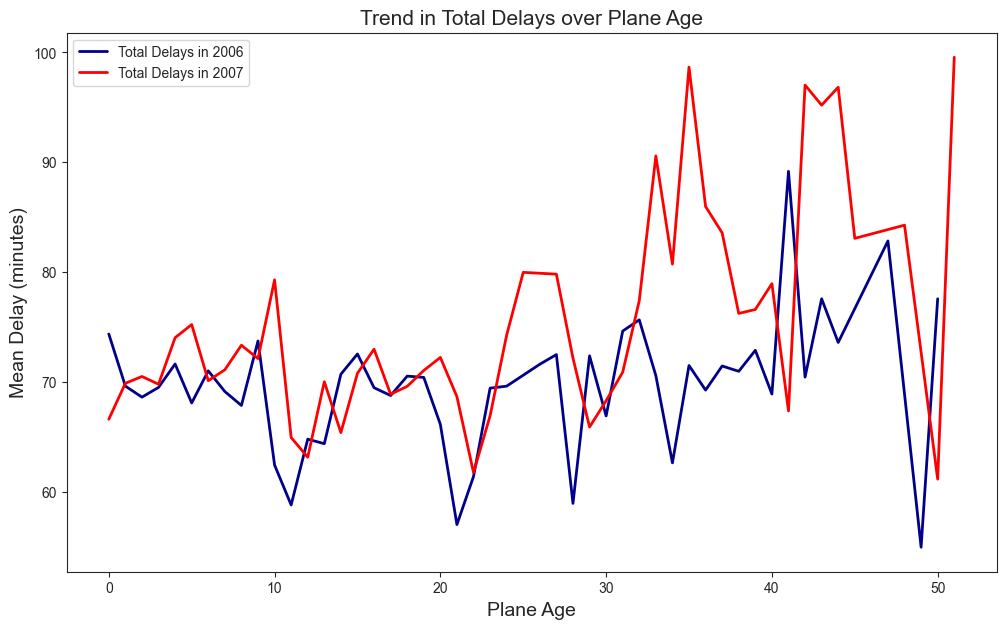

In [67]:
# Creating Line Graph to show the trend in Total Delays in 2006 and 2007

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(total_delays_2006.index, total_delays_2006, label='Total Delays in 2006',color='darkblue',linewidth=2)
ax.plot(total_delays_2007.index, total_delays_2007, label='Total Delays in 2007',color='r',linewidth=2)
ax.legend()
ax.set_xlabel('Plane Age',fontsize =14)
ax.set_ylabel('Mean Delay (minutes)',fontsize =14)
ax.set_title('Trend in Total Delays over Plane Age',fontsize=15)
plt.show()

## Overall relationship between Types of Delays and Plane Age

In [45]:
# Creating data set with Year Of Manufacture and Type of Delay
delay_types = planes_b[["TailNum","Year","YearOfManufacture","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay",'PlaneAge']]
delay_types

,TailNum,Year,YearOfManufacture,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
16,N105UW,2006,1999,0,0,149,0,0,7.0
18,N702UW,2006,1998,0,0,25,0,0,8.0
49,N746UW,2006,2000,0,0,0,0,0,6.0
50,N757UW,2006,2000,0,0,0,0,0,6.0
51,N713UW,2006,1999,14,0,17,0,6,7.0
...,...,...,...,...,...,...,...,...,...
14595128,N6700,2007,1999,0,24,0,0,0,8.0
14595129,N659DL,2007,1990,0,0,0,0,0,17.0
14595133,N829MH,2007,2000,0,0,0,0,0,7.0
14595135,N970DL,2007,1990,0,0,0,0,36,17.0


In [46]:
#dropping null values
delay_types = delay_types.dropna()

#rechecking for null values
pd.isnull(delay_types).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
PlaneAge             0
dtype: int64

In [76]:
# Creating arrays for each delay type

In [47]:
carrier_delays = delay_types[["CarrierDelay","PlaneAge"]]
carrier_delays

,CarrierDelay,PlaneAge
16,0,7.0
18,0,8.0
49,0,6.0
50,0,6.0
51,14,7.0
...,...,...
14595128,0,8.0
14595129,0,17.0
14595133,0,7.0
14595135,0,17.0


In [48]:
weather_delays = delay_types[["WeatherDelay","PlaneAge"]]
weather_delays

,WeatherDelay,PlaneAge
16,0,7.0
18,0,8.0
49,0,6.0
50,0,6.0
51,0,7.0
...,...,...
14595128,24,8.0
14595129,0,17.0
14595133,0,7.0
14595135,0,17.0


In [49]:
NAS_delays = delay_types[["NASDelay","PlaneAge"]]
NAS_delays

,NASDelay,PlaneAge
16,149,7.0
18,25,8.0
49,0,6.0
50,0,6.0
51,17,7.0
...,...,...
14595128,0,8.0
14595129,0,17.0
14595133,0,7.0
14595135,0,17.0


In [50]:
security_delays = delay_types[["SecurityDelay","PlaneAge"]]
security_delays

,SecurityDelay,PlaneAge
16,0,7.0
18,0,8.0
49,0,6.0
50,0,6.0
51,0,7.0
...,...,...
14595128,0,8.0
14595129,0,17.0
14595133,0,7.0
14595135,0,17.0


In [51]:
late_aircraft_delays = delay_types[["LateAircraftDelay","PlaneAge"]]
late_aircraft_delays

,LateAircraftDelay,PlaneAge
16,0,7.0
18,0,8.0
49,0,6.0
50,0,6.0
51,6,7.0
...,...,...
14595128,0,8.0
14595129,0,17.0
14595133,0,7.0
14595135,36,17.0


In [ ]:
# Making delays<1 null values
carrier_delays['CarrierDelay'] = np.where(carrier_delays['CarrierDelay'] <1, np.nan, carrier_delays['CarrierDelay'])

weather_delays['WeatherDelay'] = np.where(weather_delays['WeatherDelay'] <1, np.nan, weather_delays['WeatherDelay'])

NAS_delays['NASDelay'] = np.where(NAS_delays['NASDelay'] <1, np.nan, NAS_delays['NASDelay'])

security_delays['SecurityDelay'] = np.where(security_delays['SecurityDelay'] <1, np.nan, security_delays['SecurityDelay'])

late_aircraft_delays['LateAircraftDelay'] = np.where(late_aircraft_delays['LateAircraftDelay'] <1, np.nan, late_aircraft_delays['LateAircraftDelay'])

In [83]:
# Dropping null values

In [53]:
carrier_delays = carrier_delays.dropna()
carrier_delays

,CarrierDelay,PlaneAge
51,14.0,7.0
122,15.0,17.0
125,6.0,5.0
128,16.0,17.0
151,4.0,6.0
...,...,...
14595084,21.0,15.0
14595106,22.0,16.0
14595118,5.0,6.0
14595119,9.0,7.0


In [54]:
weather_delays = weather_delays.dropna()
weather_delays

,WeatherDelay,PlaneAge
69,23.0,6.0
78,107.0,19.0
85,14.0,6.0
88,7.0,17.0
942,19.0,7.0
...,...,...
14594886,21.0,17.0
14595077,22.0,14.0
14595115,26.0,14.0
14595123,44.0,19.0


In [55]:
NAS_delays = NAS_delays.dropna()
NAS_delays

,NASDelay,PlaneAge
16,149.0,7.0
18,25.0,8.0
51,17.0,7.0
69,7.0,6.0
76,58.0,19.0
...,...,...
14595120,2.0,8.0
14595123,4.0,19.0
14595124,41.0,22.0
14595126,22.0,17.0


In [56]:
security_delays = security_delays.dropna()
security_delays

,SecurityDelay,PlaneAge
4503,64.0,8.0
5029,8.0,20.0
6136,9.0,1.0
8187,16.0,18.0
8211,27.0,19.0
...,...,...
14576112,13.0,8.0
14576359,14.0,10.0
14576562,63.0,8.0
14576833,14.0,6.0


In [57]:
late_aircraft_delays = late_aircraft_delays.dropna()
late_aircraft_delays

,LateAircraftDelay,PlaneAge
51,6.0,7.0
69,6.0,6.0
76,121.0,19.0
77,18.0,6.0
78,3.0,19.0
...,...,...
14595118,7.0,6.0
14595119,4.0,7.0
14595120,38.0,8.0
14595126,15.0,17.0


In [89]:
# Creating boxplots to see their distributions

In [58]:
carrierdelay = carrier_delays["CarrierDelay"]

weatherdelay = weather_delays["WeatherDelay"]

NASdelay = NAS_delays["NASDelay"]

securitydelay = security_delays["SecurityDelay"]

lateaircraftdelay = late_aircraft_delays["LateAircraftDelay"]

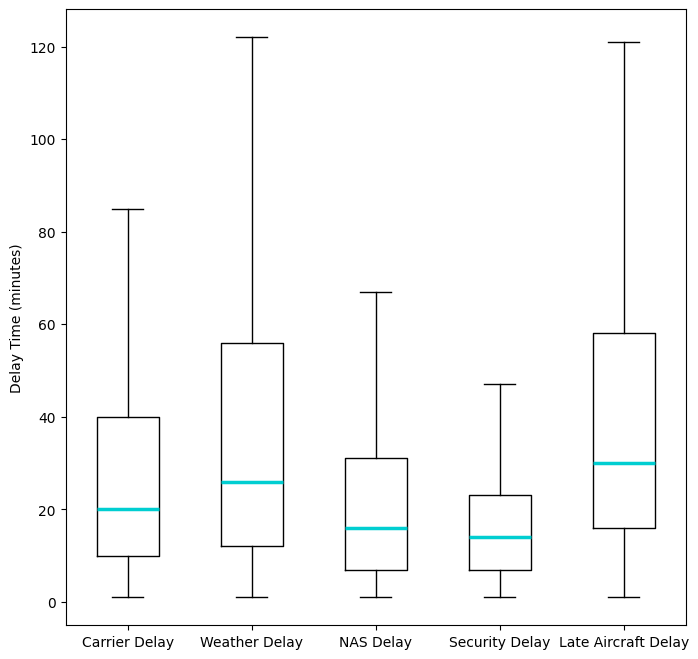

In [59]:
#Outliers have been removed for better readability
fig, ax = plt.subplots(figsize=(8, 8))
boxplot = ax.boxplot([carrierdelay, weatherdelay, NASdelay, securitydelay, lateaircraftdelay], showfliers=False)

for median_line in boxplot['medians']:
    median_line.set_color('darkturquoise') 
    median_line.set_linewidth(2.5)

ax.set_xticklabels(['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay'])
ax.set_ylabel('Delay Time (minutes)')
ax.grid(False)
plt.show()

In [60]:
#calculating mean for each delay type for each plane age

planeage_avgcarrierdelay = carrier_delays.groupby('PlaneAge')['CarrierDelay'].mean().reset_index()

planeage_avgweatherdelay = weather_delays.groupby('PlaneAge')['WeatherDelay'].mean().reset_index()

planeage_avgnasdelay = NAS_delays.groupby('PlaneAge')['NASDelay'].mean().reset_index()

planeage_avgsecuritydelay = security_delays.groupby('PlaneAge')['SecurityDelay'].mean().reset_index()

planeage_avglateaircraftdelay = late_aircraft_delays.groupby('PlaneAge')['LateAircraftDelay'].mean().reset_index()

In [61]:
#merging the mean for each delay types

merged_delaytypes = pd.merge(planeage_avgcarrierdelay,planeage_avgweatherdelay, on='PlaneAge')

merged_delaytypes = pd.merge(merged_delaytypes,planeage_avgnasdelay, on='PlaneAge')

merged_delaytypes = pd.merge(merged_delaytypes,planeage_avgsecuritydelay, on='PlaneAge')

merged_delaytypes = pd.merge(merged_delaytypes,planeage_avglateaircraftdelay, on='PlaneAge')

In [62]:
merged_delaytypes.head()

,PlaneAge,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,29.388981,56.805485,30.774899,18.165079,47.566081
1,1.0,33.432668,54.543117,31.919012,21.876338,48.208182
2,2.0,34.876667,46.957807,30.401029,22.423212,46.384659
3,3.0,37.518488,47.842860,29.760869,21.427247,46.742606
4,4.0,39.899593,49.682141,30.263340,21.927536,48.601139


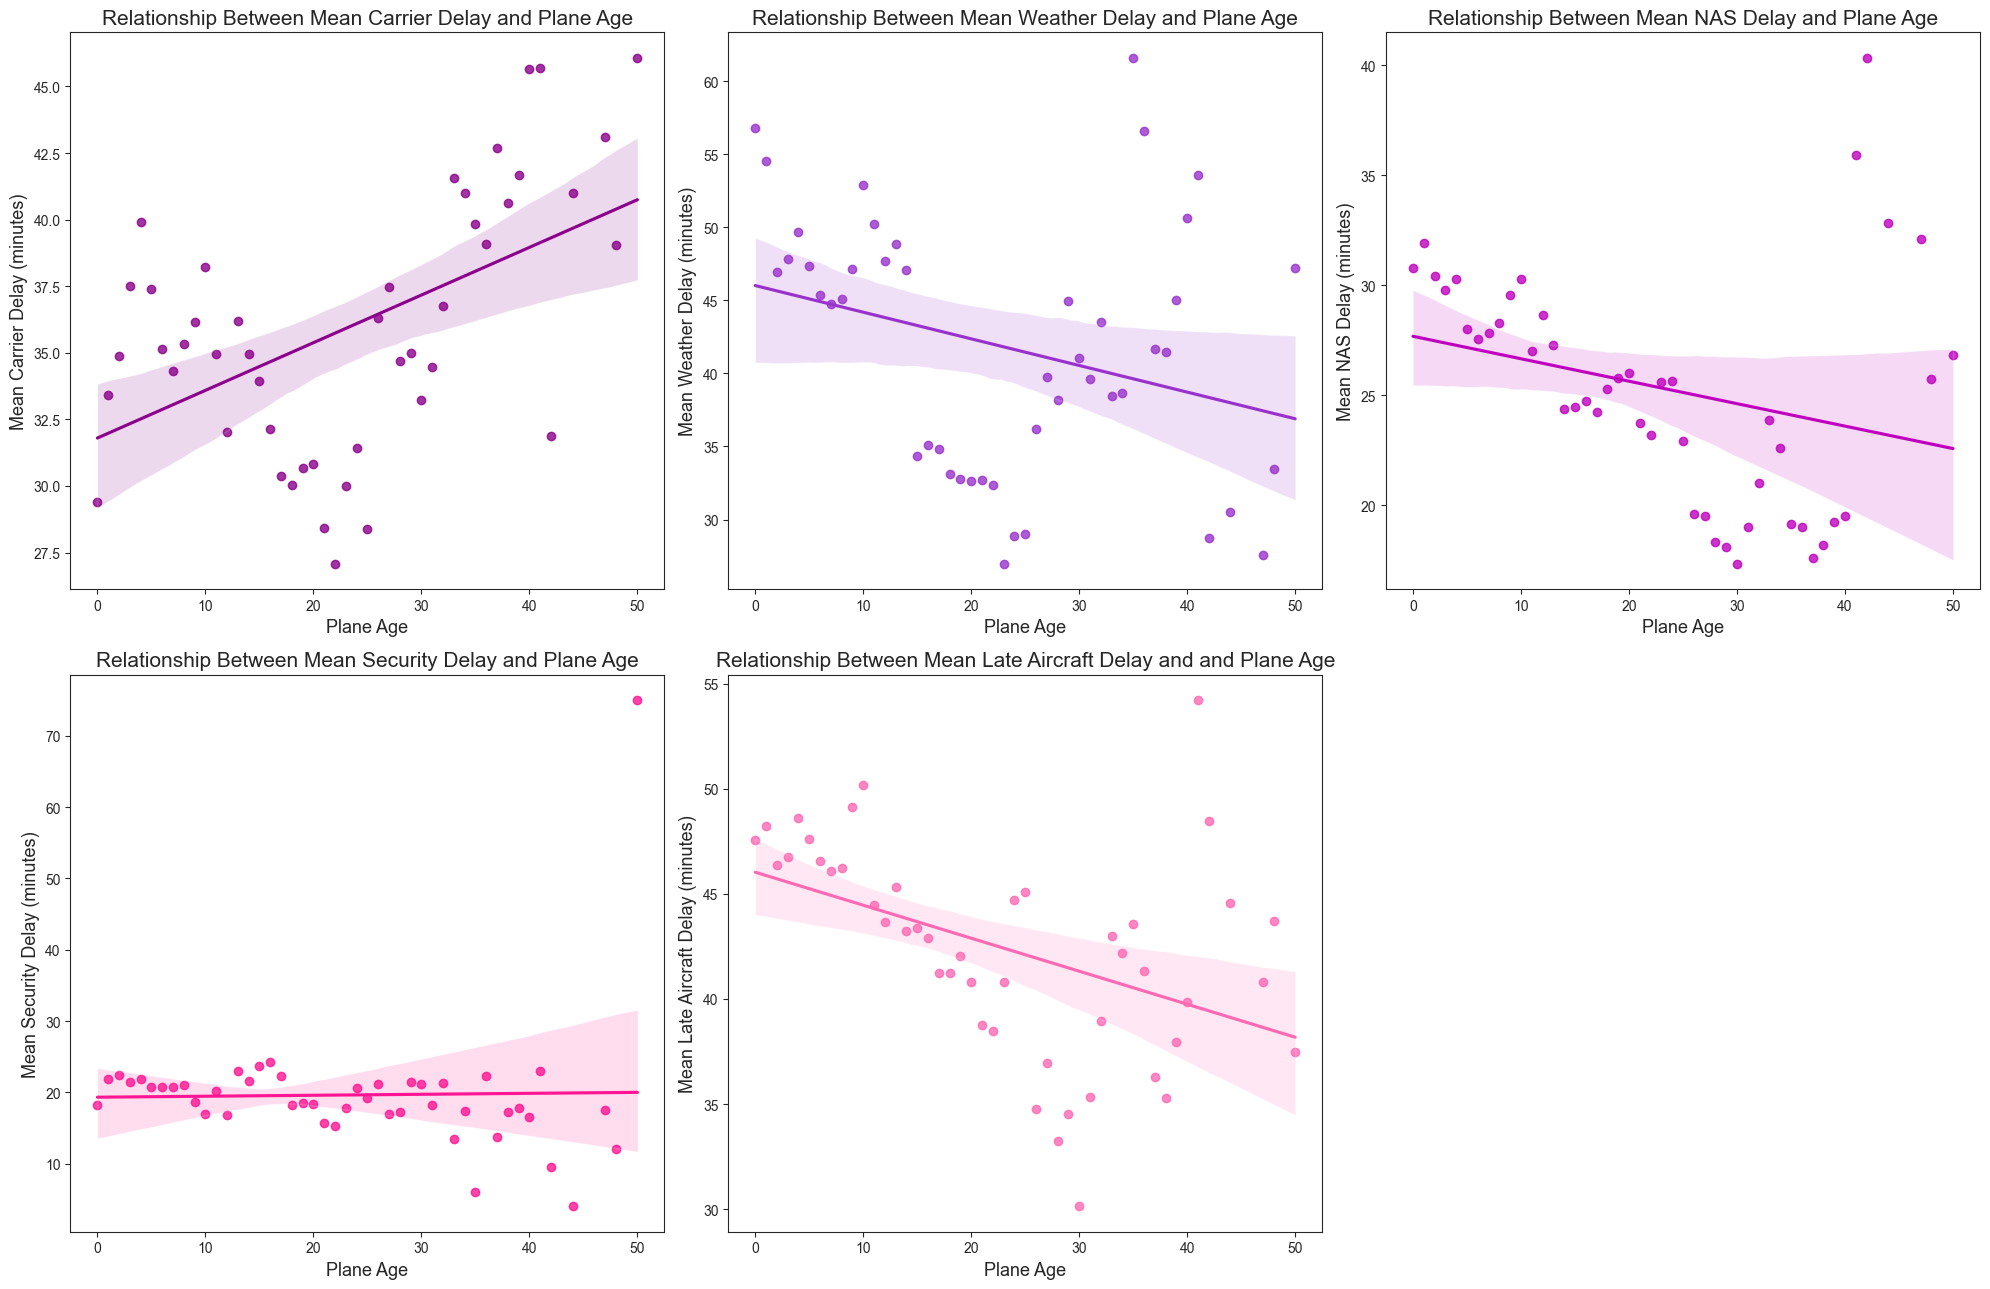

In [65]:
# Creating scatter plots to display relationship with delay types and plane age

sns.set_style('ticks')
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 13))
# Carrier Delay
sns.regplot(x='PlaneAge', y='CarrierDelay', data=merged_delaytypes, ax=axs[0, 0],color=('darkmagenta'))
axs[0, 0].set_xlabel('Plane Age',fontsize=13)
axs[0, 0].set_ylabel('Mean Carrier Delay (minutes)',fontsize=13)
axs[0, 0].set_title('Relationship Between Mean Carrier Delay and Plane Age',fontsize=15)

# Weather Delay
sns.regplot(x='PlaneAge', y='WeatherDelay', data=merged_delaytypes, ax=axs[0, 1], color=('darkorchid'))
axs[0, 1].set_xlabel('Plane Age',fontsize=13)
axs[0, 1].set_ylabel('Mean Weather Delay (minutes)',fontsize=13)
axs[0, 1].set_title('Relationship Between Mean Weather Delay and Plane Age',fontsize=15)

# NAS Delay
sns.regplot(x='PlaneAge', y='NASDelay', data=merged_delaytypes, ax=axs[0, 2], color=('m'))
axs[0, 2].set_xlabel('Plane Age',fontsize=13)
axs[0, 2].set_ylabel('Mean NAS Delay (minutes)',fontsize=13)
axs[0, 2].set_title('Relationship Between Mean NAS Delay and Plane Age',fontsize=15)

# Security Delay
sns.regplot(x='PlaneAge', y='SecurityDelay', data=merged_delaytypes, ax=axs[1, 0],color=('deeppink'))
axs[1, 0].set_xlabel('Plane Age',fontsize=13)
axs[1, 0].set_ylabel('Mean Security Delay (minutes)',fontsize=13)
axs[1, 0].set_title('Relationship Between Mean Security Delay and Plane Age',fontsize=15)

# Late Aircraft Delay
sns.regplot(x='PlaneAge', y='LateAircraftDelay', data=merged_delaytypes, ax=axs[1, 1],color=('hotpink'))
axs[1, 1].set_xlabel('Plane Age',fontsize=13)
axs[1, 1].set_ylabel('Mean Late Aircraft Delay (minutes)',fontsize=13)
axs[1, 1].set_title('Relationship Between Mean Late Aircraft Delay and and Plane Age',fontsize=15)

axs[1, 2].set_visible(False)
fig.tight_layout()
plt.show()

In [96]:
# Checking the Correlation between Delay Types and Plane Age

corr, pval = pearsonr(merged_delaytypes['CarrierDelay'], merged_delaytypes.index)
print('Carrier Delay and Plane Age correlation:', corr)

corr, pval = pearsonr(merged_delaytypes['WeatherDelay'], merged_delaytypes.index)
print('Weather Delay and Plane Age correlation:', corr)

corr, pval = pearsonr(merged_delaytypes['NASDelay'], merged_delaytypes.index)
print('NAS Delay and Plane Age correlation:', corr)

corr, pval = pearsonr(merged_delaytypes['SecurityDelay'], merged_delaytypes.index)
print('Security Delay and Plane Age correlation:', corr)

corr, pval = pearsonr(merged_delaytypes['LateAircraftDelay'], merged_delaytypes.index)
print('Late Aircraft Delay and Plane Age correlation:', corr)


Carrier Delay and Plane Age correlation: 0.512352019368423
Weather Delay and Plane Age correlation: -0.29147748475534857
NAS Delay and Plane Age correlation: -0.29532965339490896
Security Delay and Plane Age correlation: -0.009004136096114916
Late Aircraft Delay and Plane Age correlation: -0.45051601215876164
